In [425]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [700]:
df_train = pd.read_csv('C:/Users/radit/Downloads/train.csv')
df_train.head(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0
1,304,SEPHORA COLLECTION,no category,Happy Birthday Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/happy-birthday...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
2,404,SEPHORA COLLECTION,no category,Lips Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/lips-gift-card...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
3,443,SEPHORA COLLECTION,no category,Thank You Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/thank-you-gift...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
4,463,SEPHORA COLLECTION,no category,Heart Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/heart-gift-car...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0


In [701]:
df_test = pd.read_csv("C:/Users/radit/Downloads/test.csv")
df_test.head(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2294049,Benefit Cosmetics,Eye Palettes,Brow Zings Pro Palette,no size,3.5,15,2200,39.0,39.0,...,False,0,no options,What it is: A portable eyebrow palette feature...,Suggested Usage:-Apply brow wax and brow powde...,Wax Shade One: Ricinus Communis (Castor) Seed ...,0,0,0,0
1,2294312,FENTY BEAUTY by Rihanna,Mascara,"Full Frontal Volume, Lift & Curl Mascara",0.42 fl oz / 12.5 mL,4.0,2000,32900,24.0,24.0,...,True,exclusive,no options,What it is: A do-it-all mascara that is design...,Suggested Usage:-Use the Fat side to load and ...,Aqua/Water/Eau- Synthetic Beeswax- Paraffin- P...,0,1,0,0
2,2294346,Atelier Cologne,Perfume Gift Sets,Clementine California Cologne Absolue Pure Per...,1 oz/ 30 mL,0.0,0,206,80.0,80.0,...,True,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,1,1,0
3,2294353,Atelier Cologne,Perfume Gift Sets,Orange Sanguine Cologne Absolue Pure Perfume +...,1 oz/ 30 mL,0.0,0,232,80.0,80.0,...,True,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,1,1,0
4,2294361,Atelier Cologne,Perfume Gift Sets,Pacific Lime Cologne Absolue Pure Perfume + Le...,1 oz/ 30 mL,0.0,0,138,80.0,80.0,...,True,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,1,1,0


In [617]:
df_train[['rating','number_of_reviews','love','price','value_price']].describe()

,rating,number_of_reviews,love,price,value_price
count,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000
mean,4.087313,303.694250,1.757584e+04,49.903846,51.082835
std,0.758233,931.236885,4.421160e+04,46.854991,48.513402
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,232.000000,1.540000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [639]:
df_train.isnull().sum()

id                   0
brand                0
category             0
name                 0
size                 0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
URL                  0
MarketingFlags       0
options              0
details              0
how_to_use           0
ingredients          0
exclusive            0
dtype: int64

In [640]:
df_test.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [641]:
# Untuk menghilangkan duplikat
df_train = df_train.drop_duplicates()

# Exploratory Data Analysis

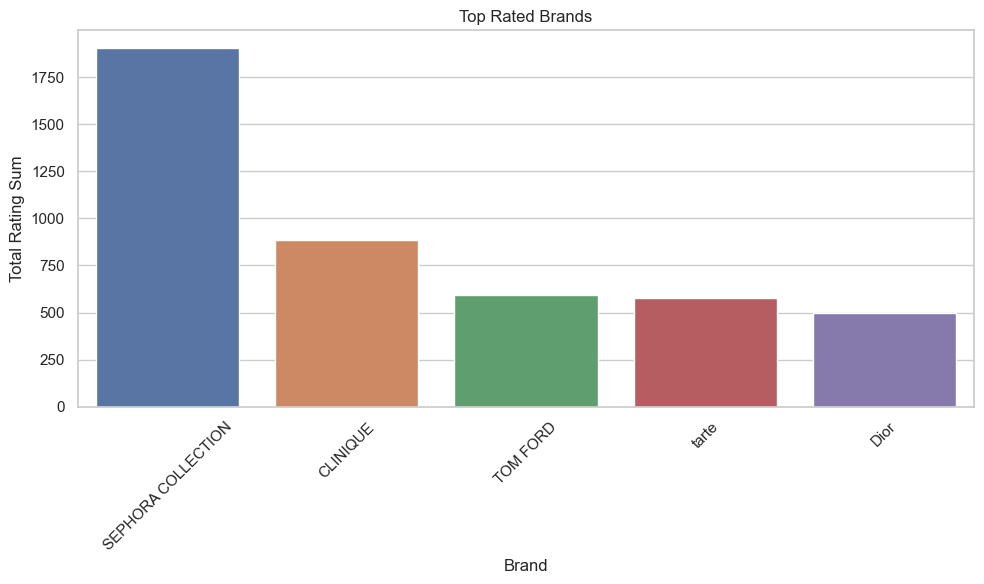

In [432]:
# Jumlah rating yang dihasilkan brand terkenal dan brand lainnya
# Group by 'brand' and calculate the sum of ratings
brand_rating = df_train.groupby('brand')['rating'].sum().reset_index()

# Sort the data by sum of ratings in descending order
brand_rating = brand_rating.sort_values(by='rating', ascending=False)

# Keep only the top 5 brands
top_5_brands = brand_rating.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='brand', y='rating')
plt.xlabel('Brand')
plt.ylabel('Total Rating Sum')
plt.title('Top Rated Brands')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

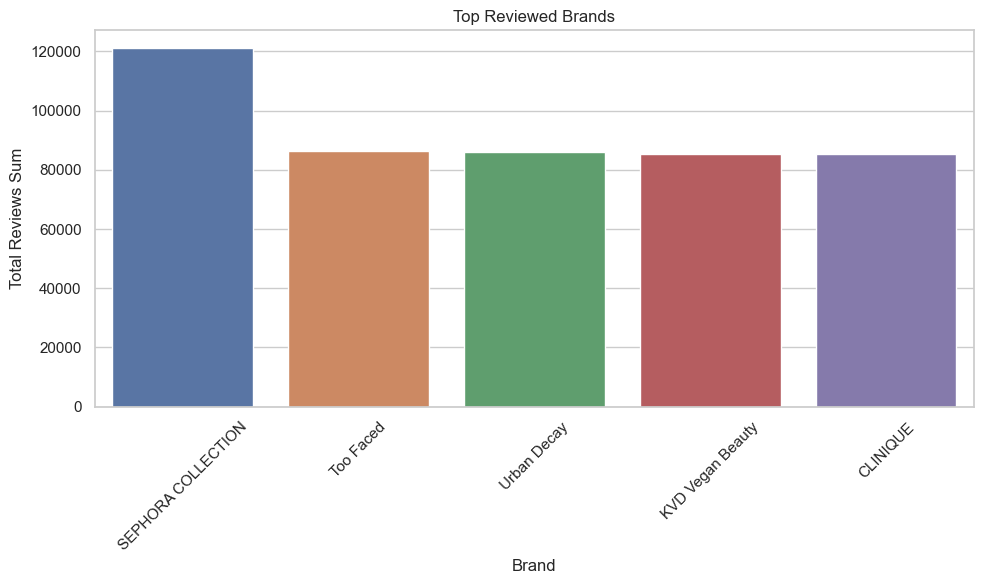

In [433]:
# Visualisasi top 5 reviews
# Group by 'brand' and calculate the sum of reviews
brand_reviews = df_train.groupby('brand')['number_of_reviews'].sum().reset_index()

# Sort the data by sum of number of reviews in descending order
brand_reviews = brand_reviews.sort_values(by='number_of_reviews', ascending=False)

# Keep only the top 5 brands
top_5_brands = brand_reviews.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='brand', y='number_of_reviews')
plt.xlabel('Brand')
plt.ylabel('Total Reviews Sum')
plt.title('Top Reviewed Brands')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

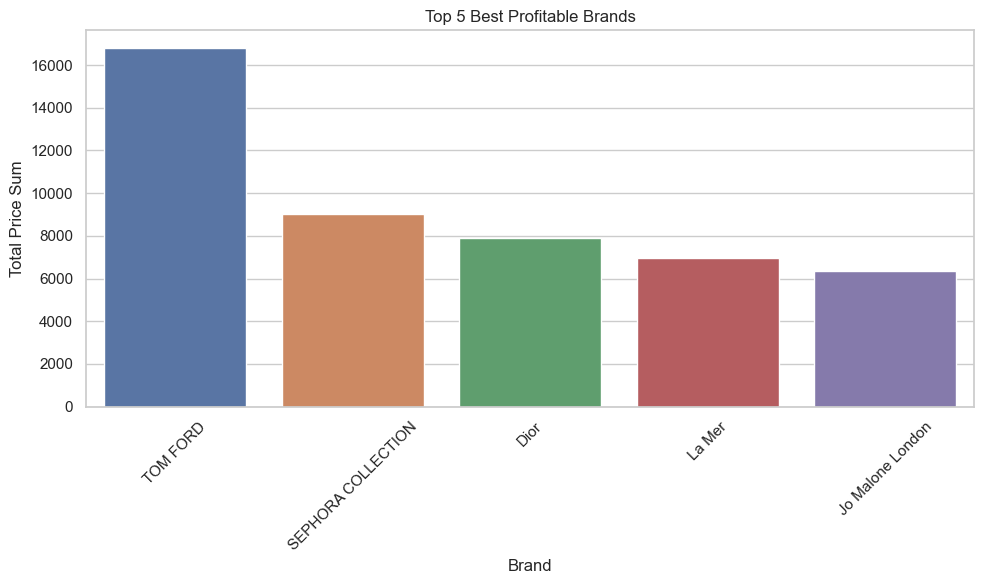

In [434]:
# Visualisasi top 5 best profitable brand
# Group by 'brand' and calculate the sum of price
brand_prices = df_train.groupby('brand')['price'].sum().reset_index()

# Sort the data by mean of price in descending order
brand_prices = brand_prices.sort_values(by='price', ascending=False)

# Keep only the top 5 brands
top_5_brands = brand_prices.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='brand', y='price')
plt.xlabel('Brand')
plt.ylabel('Total Price Sum')
plt.title('Top 5 Best Profitable Brands')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

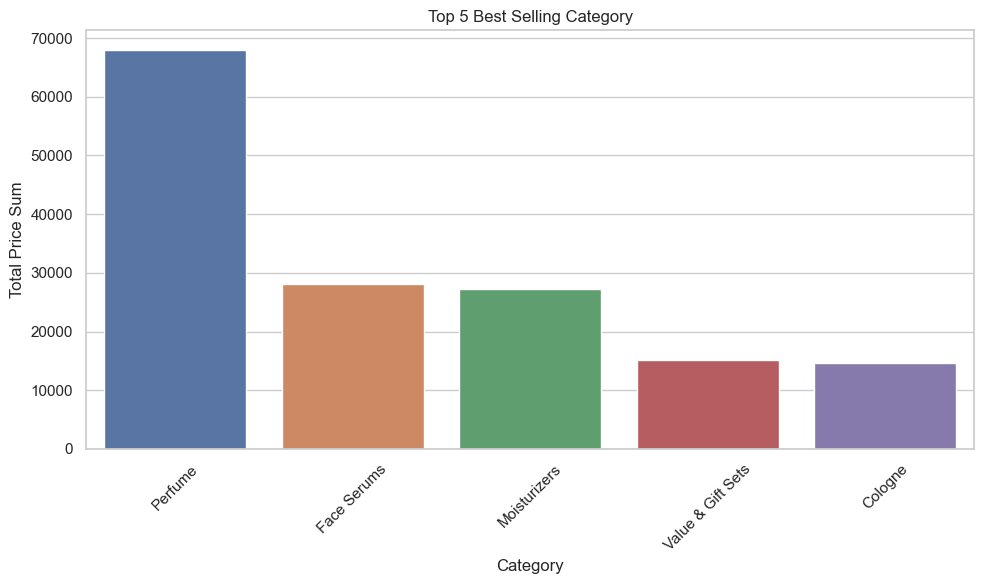

In [435]:
# Visualisasi top 5 best selling category
# Group by 'category' and calculate the sum of price
category_prices = df_train.groupby('category')['price'].sum().reset_index()

# Sort the data by sum of price in descending order
category_prices = category_prices.sort_values(by='price', ascending=False)

# Keep only the top 5 category
top_5_brands = category_prices.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Total Price Sum')
plt.title('Top 5 Best Selling Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

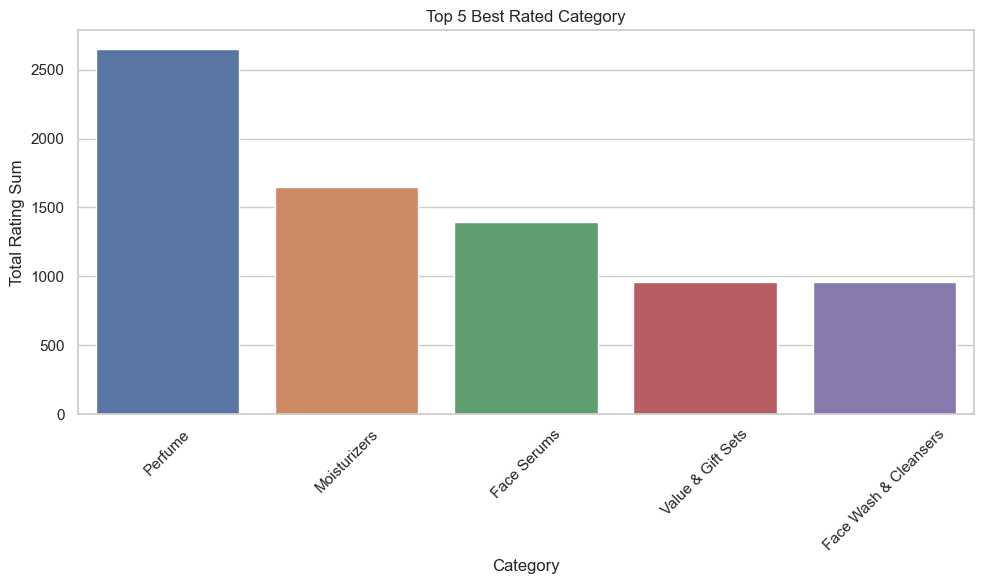

In [436]:
# Visualisasi top 5 best rated category
# Group by 'category' and calculate the sum of rating
category_ratings = df_train.groupby('category')['rating'].sum().reset_index()

# Sort the data by sum of ratings in descending order
category_ratings = category_ratings.sort_values(by='rating', ascending=False)

# Keep only the top 5 category
top_5_brands = category_ratings.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='category', y='rating')
plt.xlabel('Category')
plt.ylabel('Total Rating Sum')
plt.title('Top 5 Best Rated Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

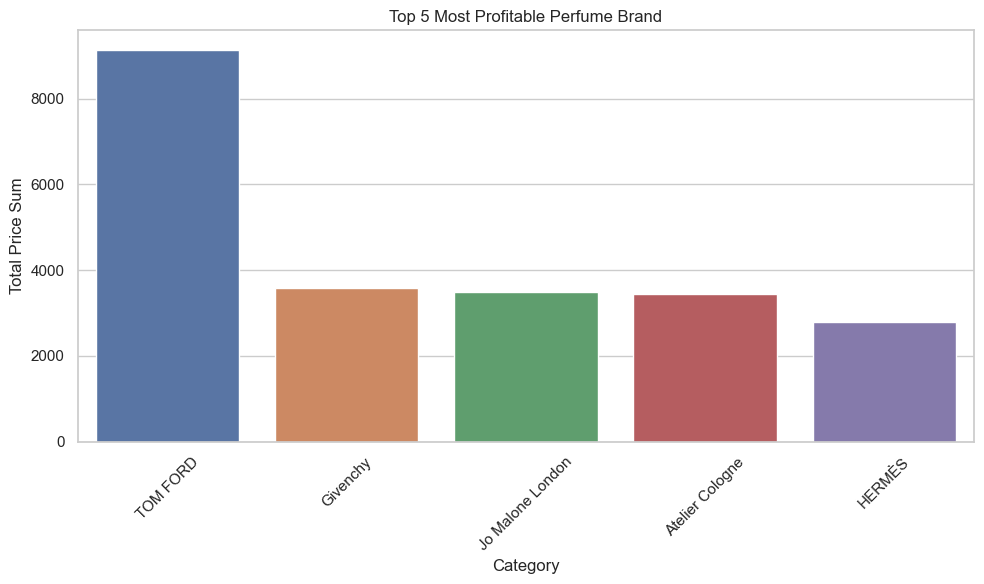

In [437]:
which_perfume = df_train[df_train['category'] == 'Perfume']
brands_perfume = which_perfume.groupby('brand')['price'].sum().reset_index()
brands_perfume = brands_perfume.sort_values(by='price', ascending=False)
top_5_brands = brands_perfume.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_brands, x='brand', y='price')
plt.xlabel('Category')
plt.ylabel('Total Price Sum')
plt.title('Top 5 Most Profitable Perfume Brand')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

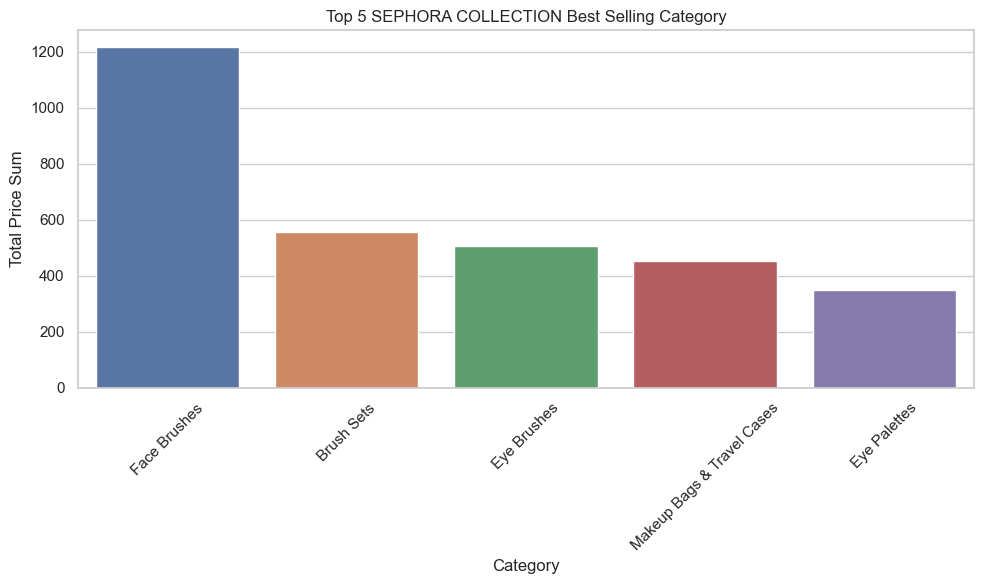

In [438]:
which_brand = df_train[df_train['brand'] == 'SEPHORA COLLECTION']
sephora_brand = which_brand.groupby('category')['price'].sum().reset_index()
sephora_brand = sephora_brand.sort_values(by='price', ascending=False)
top_5_category = sephora_brand.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_category, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Total Price Sum')
plt.title('Top 5 SEPHORA COLLECTION Best Selling Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


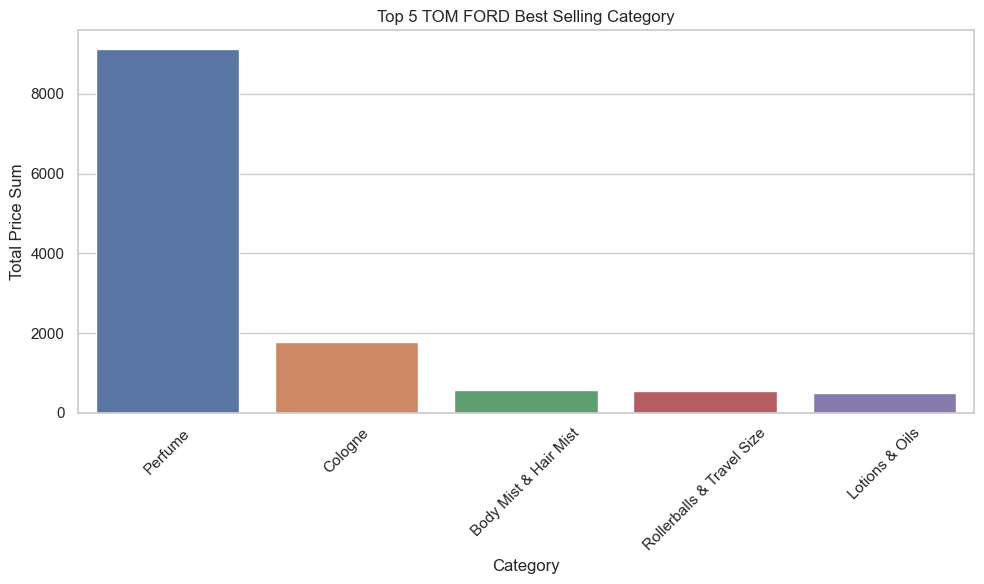

In [439]:
which_brand = df_train[df_train['brand'] == 'TOM FORD']
sephora_brand = which_brand.groupby('category')['price'].sum().reset_index()
sephora_brand = sephora_brand.sort_values(by='price', ascending=False)
top_5_category = sephora_brand.head(5)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_category, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Total Price Sum')
plt.title('Top 5 TOM FORD Best Selling Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [440]:
# Copying originial dataframe and grouping the brand
second_df = df_train.copy()
brand_counts = second_df['brand'].value_counts()
brands_to_change = brand_counts[brand_counts < 46].index.tolist()
second_df.loc[second_df['brand'].isin(brands_to_change), 'brand'] = 'lainnya'
second_df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0
1,304,SEPHORA COLLECTION,no category,Happy Birthday Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/happy-birthday...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
2,404,SEPHORA COLLECTION,no category,Lips Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/lips-gift-card...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
3,443,SEPHORA COLLECTION,no category,Thank You Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/thank-you-gift...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
4,463,SEPHORA COLLECTION,no category,Heart Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/heart-gift-car...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0


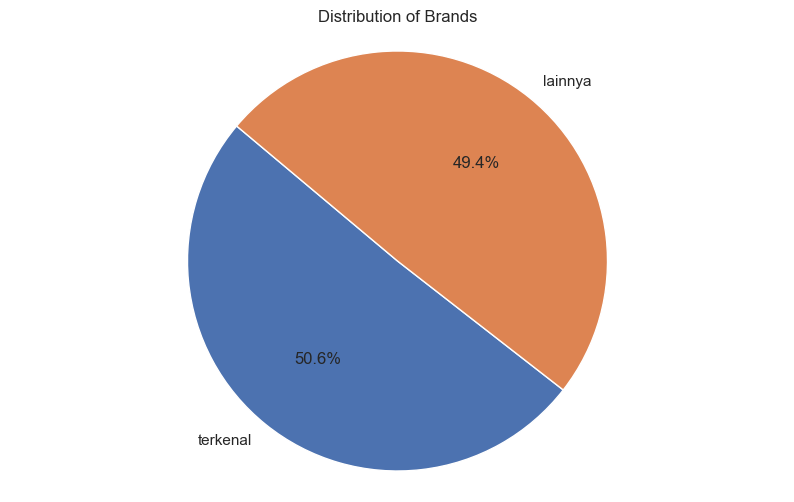

In [441]:
second_brands_counts = second_df['brand'].value_counts()
brands_to_change = second_brands_counts[second_brands_counts < 500].index.tolist()
second_df.loc[second_df['brand'].isin(brands_to_change), 'brand'] = 'terkenal'


# Distribusi antara brand terkenal dan lainnya
counts = second_df['brand'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.axis('equal')
plt.show()

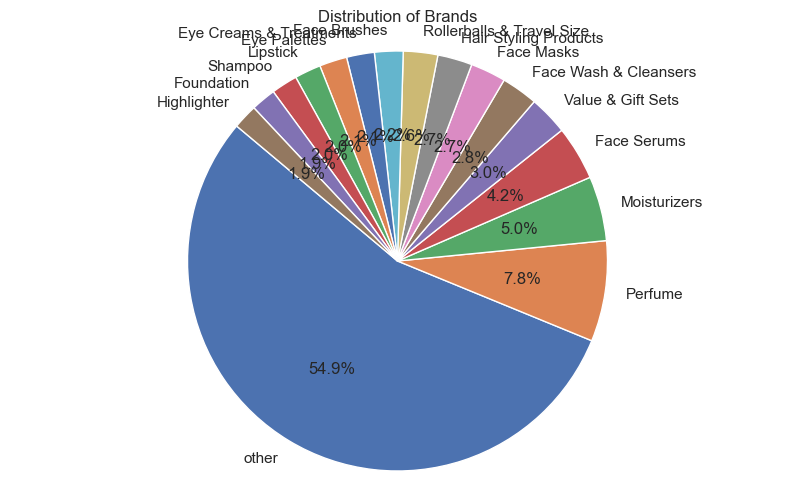

In [442]:
category_counts = second_df['category'].value_counts()
category_to_change = category_counts[category_counts < 150].index.tolist()
second_df.loc[second_df['category'].isin(category_to_change), 'category'] = 'other'

# Distribusi antara category terkenal dan lainnya
counts = second_df['category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.axis('equal')
plt.show()

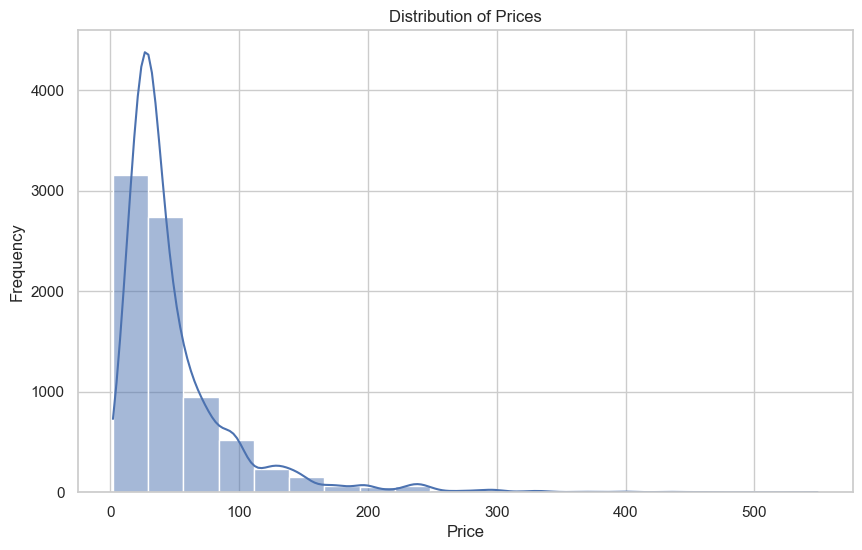

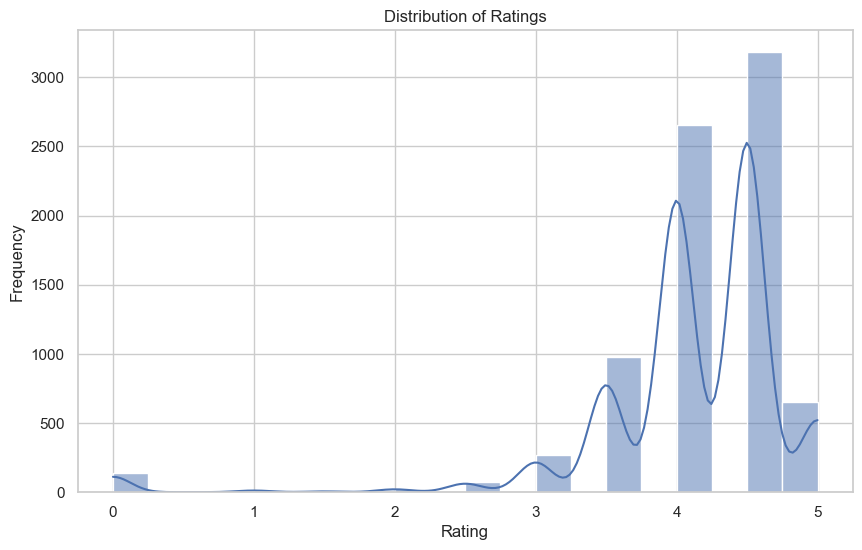

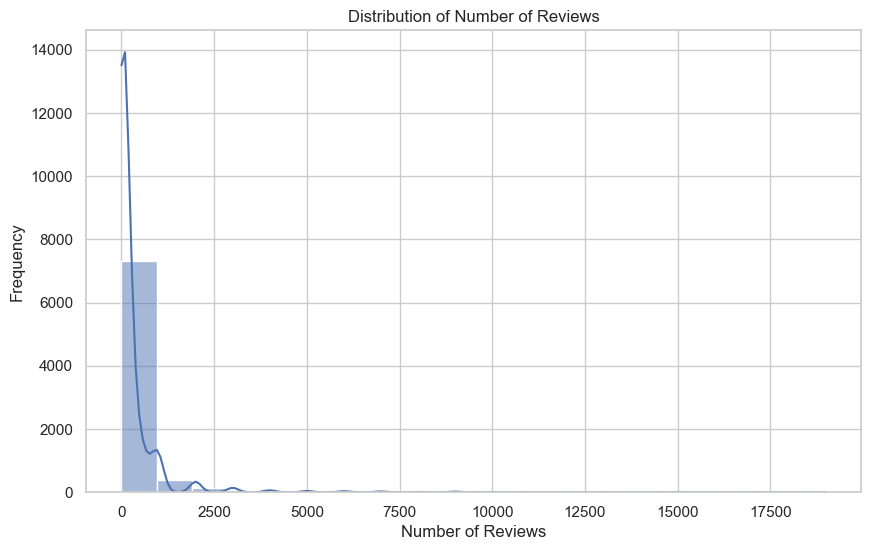

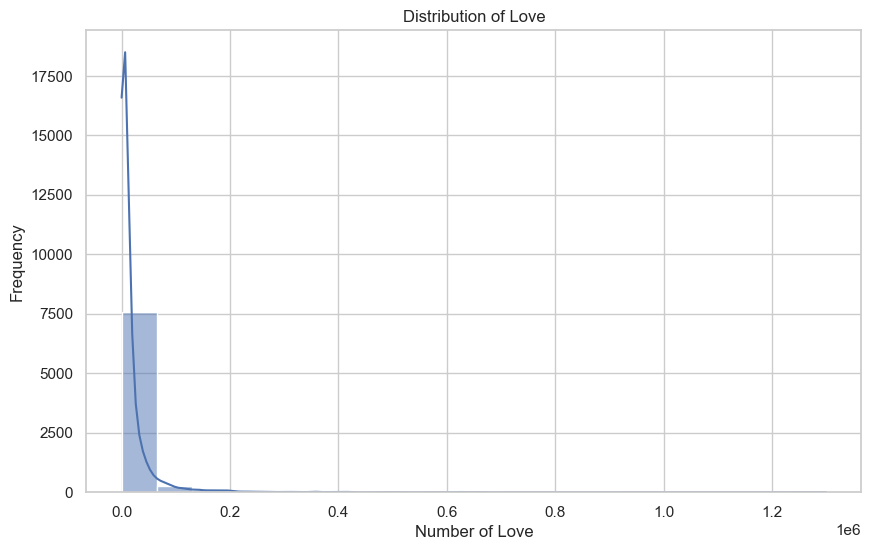

In [443]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a histogram plot for price
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='price', bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a histogram plot for rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Create a histogram plot for number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='number_of_reviews', bins=20, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Create a histogram plot for love
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='love', bins=20, kde=True)
plt.title('Distribution of Love')
plt.xlabel('Number of Love')
plt.ylabel('Frequency')
plt.show()

In [444]:
print(f"The skewness of price is : {df_train['price'].skew()}")
print(f"The skewness of price is : {df_train['number_of_reviews'].skew()}")
print(f"The skewness of price is : {df_train['rating'].skew()}")

The skewness of price is : 3.1445126525085443
The skewness of price is : 9.510442057656366
The skewness of price is : -3.0094963711381855


# Transformasi Data

In [702]:
# Mengubah kolom brand menjadi 2 value 
brands_counts = df_train['brand'].value_counts()
brands_to_change = brands_counts[brands_counts <= 50].index.tolist()
df_train.loc[df_train['brand'].isin(brands_to_change), 'brand'] = 'other'


In [703]:
brands_counts = df_train['brand'].value_counts()
brands_to_change = brands_counts[brands_counts <= 500].index.tolist()
df_train.loc[df_train['brand'].isin(brands_to_change), 'brand'] = 'top_product'

In [704]:
df_train['brand'].value_counts()

brand
other          4289
top_product    3711
Name: count, dtype: int64

In [705]:
# Mengubah kolom category menjadi 2 value 
category_counts = df_train['category'].value_counts()
category_to_change = category_counts[category_counts < 130].index.tolist()
df_train.loc[df_train['category'].isin(category_to_change), 'category'] = 'other'

In [706]:
# Mengubah kolom brand menjadi 2 value 
category_counts = df_train['category'].value_counts()
category_to_change = category_counts[category_counts < 630].index.tolist()
df_train.loc[df_train['category'].isin(category_to_change), 'category'] = 'top_category'

In [707]:
df_train['category'].value_counts()

category
top_category    4027
other           3973
Name: count, dtype: int64

In [708]:
# Mengubah kolom size menjadi 2 value
size_counts = df_train['size'].value_counts()
size_to_change = size_counts[size_counts < 500].index.tolist()
df_train.loc[df_train['size'].isin(size_to_change), 'size'] = 'with size'

In [709]:
df_train['size'].value_counts()

size
with size    5351
no size      2649
Name: count, dtype: int64

In [710]:
how_to_use_counts = df_train['how_to_use'].value_counts()
how_to_use_change = how_to_use_counts[how_to_use_counts < 270].index.tolist()
df_train.loc[df_train['how_to_use'].isin(how_to_use_change), 'how_to_use'] = 'with instructions'

In [711]:
df_train['how_to_use'].value_counts()

how_to_use
with instructions    6511
no instructions      1489
Name: count, dtype: int64

In [712]:
#function ini akan melakukan deteksi terhadap baris mana di kolom mana yang termasuk outlier, apabila kurang dari q1 - 1.5 * interquartile range dan melebihi q3 - 1.5 * interquartile range
def no_outliers(data, n, features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5*IQR
    outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
  return multiple_outliers

In [713]:
dropped_outliers = no_outliers(df_train,2,['rating','number_of_reviews','love','price'])
print("kita akan mendrop {} index".format(len(dropped_outliers)), dropped_outliers)

kita akan mendrop 18 index [1812, 2242, 3362, 4831, 4843, 493, 608, 663, 688, 1186, 1562, 2038, 2118, 2512, 2649, 2734, 3141, 3355]


In [714]:
# Penerapan standardscaler()
scaler = StandardScaler()
df_train[['rating','number_of_reviews','love','price']] = scaler.fit_transform(df_train[['rating','number_of_reviews','love','price']])

In [715]:
df_train.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,top_product,other,Gift Card,no size,1.203779,-0.27674,-0.397564,0.002052,50.0,https://www.sephora.com/product/gift-card-P370...,False,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0
1,304,top_product,other,Happy Birthday Gift Card,no size,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/happy-birthday...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
2,404,top_product,other,Lips Gift Card,no size,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/lips-gift-card...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
3,443,top_product,other,Thank You Gift Card,no size,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/thank-you-gift...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
4,463,top_product,other,Heart Gift Card,no size,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/heart-gift-car...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0


In [716]:
df_train['size'].value_counts()

size
with size    5351
no size      2649
Name: count, dtype: int64

In [717]:
brand_mapping = {'top_product' : 0, 'other' : 1}
category_mapping = {'top_category' : 0, 'other' : 1}
how_to_use_mapping = {'no instructions' : 0, 'with instructions' : 1}
size_mapping = {'no size' : 0, 'with size' : 1}

In [718]:
df_train['brand'] = df_train['brand'].map(brand_mapping)
df_train['category'] = df_train['category'].map(category_mapping)
df_train['size'] = df_train['size'].map(size_mapping)
df_train['how_to_use'] = df_train['how_to_use'].map(how_to_use_mapping)

In [719]:
df_train['MarketingFlags'] = df_train['MarketingFlags'].map({True: 1, False: 0})

In [720]:
df_train.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,0,1,Gift Card,0,1.203779,-0.27674,-0.397564,0.002052,50.0,https://www.sephora.com/product/gift-card-P370...,0,no options,What it is:- Available in denominations of $10...,0,unknown,0
1,304,0,1,Happy Birthday Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/happy-birthday...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
2,404,0,1,Lips Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/lips-gift-card...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
3,443,0,1,Thank You Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/thank-you-gift...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
4,463,0,1,Heart Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/heart-gift-car...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0


In [721]:
df_train['how_to_use'].value_counts()

how_to_use
1    6511
0    1489
Name: count, dtype: int64

In [722]:
brand_counts = df_test['brand'].value_counts()
brand_to_change = brand_counts[brand_counts < 10].index.tolist()
df_test.loc[df_test['brand'].isin(brand_to_change), 'brand'] = 'other'

In [723]:
brand_counts = df_test['brand'].value_counts()
brand_to_change = brand_counts[brand_counts <= 30].index.tolist()
df_test.loc[df_test['brand'].isin(brand_to_change), 'brand'] = 'top_product'

In [724]:
df_test['brand'].value_counts()

brand
other          623
top_product    541
Name: count, dtype: int64

In [725]:
scaler = StandardScaler()
df_test[['rating','number_of_reviews','love','price']] = scaler.fit_transform(df_test[['rating','number_of_reviews','love','price']])

In [726]:
category_counts = df_test['category'].value_counts()
category_to_change = category_counts[category_counts <= 30].index.tolist()
df_test.loc[df_test['category'].isin(category_to_change), 'category'] = 'other'

In [727]:
category_counts = df_test['category'].value_counts()
category_to_change = category_counts[category_counts <= 140].index.tolist()
df_test.loc[df_test['category'].isin(category_to_change), 'category'] = 'top_category'

In [728]:
df_test['category'].value_counts()

category
other           735
top_category    429
Name: count, dtype: int64

In [729]:
size_counts = df_test['size'].value_counts()
size_to_change = size_counts[size_counts <= 55].index.tolist()
df_test.loc[df_test['size'].isin(size_to_change), 'size'] = 'with size'

In [730]:
df_test.loc[df_test['how_to_use'] != 'no instructions', 'how_to_use'] = 'with instructions'

In [731]:
df_test['brand'] = df_test['brand'].map({'top_product' : 0, 'other' : 1})
df_test['category'] = df_test['category'].map({'top_category' : 0, 'other' : 1})
df_test['size'] = df_test['size'].map({'no size' : 0, 'with size' : 1})
df_test['how_to_use'] = df_test['how_to_use'].map({'no instructions' : 0, 'with instructions' : 1})
df_test['MarketingFlags'] = df_test['MarketingFlags'].map({True: 1, False: 0})

In [732]:
df_train.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,0,1,Gift Card,0,1.203779,-0.27674,-0.397564,0.002052,50.0,https://www.sephora.com/product/gift-card-P370...,0,no options,What it is:- Available in denominations of $10...,0,unknown,0
1,304,0,1,Happy Birthday Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/happy-birthday...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
2,404,0,1,Lips Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/lips-gift-card...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
3,443,0,1,Thank You Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/thank-you-gift...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0
4,463,0,1,Heart Gift Card,0,-5.390913,-0.32614,-0.397564,0.002052,50.0,https://www.sephora.com/product/heart-gift-car...,0,no options,What it is:\n- Available in denominations of $...,0,unknown,0


In [733]:
df_test.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2294049,0,0,Brow Zings Pro Palette,0,0.092357,-0.233148,-0.187683,-0.248829,39.0,...,0,0,no options,What it is: A portable eyebrow palette feature...,1,Wax Shade One: Ricinus Communis (Castor) Seed ...,0,0,0,0
1,2294312,0,1,"Full Frontal Volume, Lift & Curl Mascara",1,0.359116,3.641813,0.916540,-0.553262,24.0,...,1,exclusive,no options,What it is: A do-it-all mascara that is design...,1,Aqua/Water/Eau- Synthetic Beeswax- Paraffin- P...,0,1,0,0
2,2294346,0,0,Clementine California Cologne Absolue Pure Per...,1,-1.774953,-0.262429,-0.259403,0.583287,80.0,...,1,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,1,unknown,1,1,1,0
3,2294353,0,0,Orange Sanguine Cologne Absolue Pure Perfume +...,1,-1.774953,-0.262429,-0.258468,0.583287,80.0,...,1,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,1,unknown,1,1,1,0
4,2294361,0,0,Pacific Lime Cologne Absolue Pure Perfume + Le...,1,-1.774953,-0.262429,-0.261849,0.583287,80.0,...,1,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,1,unknown,1,1,1,0


In [734]:
X_train = df_train[['brand','category','size','rating','number_of_reviews','love','price','MarketingFlags','how_to_use']]
y_train = df_train['exclusive']
X_test = df_test[['brand','category','size','rating','number_of_reviews','love','price','MarketingFlags','how_to_use']]
y_test = df_test['exclusive']


In [735]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [739]:
# 1. Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.7534364261168385


In [794]:
# 2. Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.743127147766323


In [795]:
# 3. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.7396907216494846


In [796]:
# 4. Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.756872852233677


In [797]:
# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.743127147766323


In [798]:
# 6. Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.7491408934707904
